In [1]:
# login_dict = {'CONSUMER_KEY' : '',
#               'CONSUMER_SECRET' : '',
#               'OAUTH_TOKEN' : '',
#               'OAUTH_TOKEN_SECRET' : ''}

# import pickle
# with open('login_dict.p', 'wb') as file:
#     pickle.dump(login_dict, file)

In [2]:
import pickle
with open('login_dict.p', 'rb') as file:
    login_dict = pickle.load( file)

In [3]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY, CONSUMER_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET = login_dict.values()

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

#### Retrieving Trend

In [4]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
SG_WOE_ID = 23424948

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
sg_trends = twitter_api.trends.place(_id=SG_WOE_ID)
#twitter_api.trends.print(_id=SG_WOE_ID)
print(world_trends)
print (sg_trends)

[{'trends': [{'name': '#GaryVeePickMe', 'url': 'http://twitter.com/search?q=%23GaryVeePickMe', 'promoted_content': None, 'query': '%23GaryVeePickMe', 'tweet_volume': None}, {'name': '#NGARSA', 'url': 'http://twitter.com/search?q=%23NGARSA', 'promoted_content': None, 'query': '%23NGARSA', 'tweet_volume': 205715}, {'name': '#ReformaInjusta', 'url': 'http://twitter.com/search?q=%23ReformaInjusta', 'promoted_content': None, 'query': '%23ReformaInjusta', 'tweet_volume': 56132}, {'name': '#ESPYS', 'url': 'http://twitter.com/search?q=%23ESPYS', 'promoted_content': None, 'query': '%23ESPYS', 'tweet_volume': None}, {'name': '#كلمتين_باختصار', 'url': 'http://twitter.com/search?q=%23%D9%83%D9%84%D9%85%D8%AA%D9%8A%D9%86_%D8%A8%D8%A7%D8%AE%D8%AA%D8%B5%D8%A7%D8%B1', 'promoted_content': None, 'query': '%23%D9%83%D9%84%D9%85%D8%AA%D9%8A%D9%86_%D8%A8%D8%A7%D8%AE%D8%AA%D8%B5%D8%A7%D8%B1', 'tweet_volume': 33434}, {'name': 'Rodrigo Maia', 'url': 'http://twitter.com/search?q=%22Rodrigo+Maia%22', 'promoted_

In [5]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#GaryVeePickMe
#NGARSA
#ReformaInjusta
#ESPYS
#كلمتين_باختصار
Rodrigo Maia
Arão e Rodinei
Tabata Amaral
Vizeu
Carlos Trejo
Bagel Boss
Tábata
Armando Ramírez
Ball Four
リュウタロス
Chukwueze
Musa
Jean Pyerre
もくようび
Sith Trooper
#HerkesiMutluEdemezsinÇünkü
#محمد_عبده_في_الباحه
#göcek
#CoffeeIn5Words
#SuperEagles
#令和の間禁止すること
#見た目と心は天使か悪魔か
#Panorama
#NationalKittenDay
#Srebrenitsa
#30daysWithoutiKON
#NegacionismoM
#YoApoyoALuisErnesto
#Topíssima37
#どのくらいの女子力なのか
#RSANGA
#IDOL500M
#DiaDaPizza
#شكرا_نواف_المقيرن
#askfandoms
#MDR2019
#CashAppWednesday
#HoraDaPrevidencia
#GRExBAH
#تناقضات_الجزيره_امام_قطر
#YalnızDeğilsinErdoğan
#المقابل_المالي
#RTXOn
#LampardOut
#MemeMeganWithYourVictory


In [6]:
for trend in sg_trends[0]['trends']:
    print(trend['name'])

Dhoni
#indiavsNewzealand
Switch Lite
#TeamIndia
#BAEKHYUN_UNVILLAGE
#큥솔로_데이나잇올데이
#kyoonglight
UN Village
Jadeja
andremarkable layfisback
nintendo
dr m
Close
manila
Daniel
yeet
uncle
linkedin
correct
sweet
Grab
Harry Potter
YESSSS
blue
Fight
iran
white house
#PortfolioDay
#TeenChoice
#BAEKHYUN_CityLight
#vtxbts
#latelier_road
#NewZealand
#askjaypark
#nctzenselcaday
#unvillage_곧_도착합니다
#DAY6
#엘프의_꽃_김희철_생일축하해
#cwc2019
#nct127
#TheUntamed
#citylights
#nzvind
#twicelightsinsg
#BeBraveiKON
#BTSARMY
#pdxselcaday
#wangyibo
#TWICELIGHTSinSINGAPORE
#riseconf


In [7]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

sg_trends_set = set([trend['name'] 
                     for trend in sg_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(sg_trends_set)

print(common_trends)

set()


In [8]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#ENGSWE' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 94
Length of statuses 193
Length of statuses 266
Length of statuses 349
Length of statuses 442
{
 "created_at": "Wed Jul 10 23:42:54 +0000 2019",
 "id": 1149101722775588865,
 "id_str": "1149101722775588865",
 "text": "RT @CIA: #ENG\nWhat's the name of the river that flows through England\u2019s capital of London?\n\n#FIFAWWC #ENGSWE  #WorldFactbookTrivia",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "ENG",
    "indices": [
     9,
     13
    ]
   },
   {
    "text": "FIFAWWC",
    "indices": [
     92,
     100
    ]
   },
   {
    "text": "ENGSWE",
    "indices": [
     101,
     108
    ]
   },
   {
    "text": "WorldFactbookTrivia",
    "indices": [
     110,
     130
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "CIA",
    "name": "CIA",
    "id": 2359926157,
    "id_str": "2359926157",
    "indices": [
     3,
     7
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_ty

In [9]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @CIA: #ENG
What's the name of the river that flows through England’s capital of London?

#FIFAWWC #ENGSWE  #WorldFactbookTrivia
Favorites:  0
Retweets:  91

RT @CIA: #SWE
Sweden’s national currency is the:

#FIFAWWC #ENGSWE  #WorldFactbookTrivia
Favorites:  0
Retweets:  65

RT @oubra30: Traveling can disturb your sleeping pattern and make it even harder for you to get enough rest during your busy schedules whil…
Favorites:  0
Retweets:  25

RT @ProductsFuneral: Hope your having a lovely #weekend
Say it with Roses..

Shame #Lionnesses didn't make it.. Great game well done.. You…
Favorites:  0
Retweets:  2

RT @SnteNacional: #SNTEunoAuno 👩‍🏫👨‍🏫

🔘 #Urgente 🔘 Logra @SNTESeccion11 aumento de 6.45% 📈 para Personal de Apoyo (PAAE) tras negociación…
Favorites:  0
Retweets:  221

RT @SnteNacional: #SNTEunoAuno 👩‍🏫👨‍🏫

🔘 #Urgente 🔘 Acuerdan @Seccion60SNTE e @IPN_MX aumento adicional a salario de académicos de asignatu…
Favorites:  0
Retweets:  217

RT @BBCSport: FT: England 1-2 Sweden 

#SW

#### extracting text, screen names, and hashtags from tweets

In [10]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @CIA: #ENG\nWhat's the name of the river that flows through England\u2019s capital of London?\n\n#FIFAWWC #ENGSWE  #WorldFactbookTrivia",
 "RT @CIA: #SWE\nSweden\u2019s national currency is the:\n\n#FIFAWWC #ENGSWE  #WorldFactbookTrivia",
 "RT @oubra30: Traveling can disturb your sleeping pattern and make it even harder for you to get enough rest during your busy schedules whil\u2026",
 "RT @ProductsFuneral: Hope your having a lovely #weekend\nSay it with Roses..\n\nShame #Lionnesses didn't make it.. Great game well done.. You\u2026",
 "RT @SnteNacional: #SNTEunoAuno \ud83d\udc69\u200d\ud83c\udfeb\ud83d\udc68\u200d\ud83c\udfeb\n\n\ud83d\udd18 #Urgente \ud83d\udd18 Logra @SNTESeccion11 aumento de 6.45% \ud83d\udcc8 para Personal de Apoyo (PAAE) tras negociaci\u00f3n\u2026"
]
[
 "CIA",
 "CIA",
 "oubra30",
 "ProductsFuneral",
 "SnteNacional"
]
[
 "ENG",
 "FIFAWWC",
 "ENGSWE",
 "WorldFactbookTrivia",
 "SWE"
]
[
 "RT",
 "@CIA:",
 "#ENG",
 "What's",
 "the"
]


#### Creating a basic frequency distribution from the words in tweets

In [11]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 477), ('#ENGSWE', 260), ('the', 203), ('de', 199), ('🔘', 164), ('to', 118), ('a', 115), ('@FIFAWWC:', 106), ('#FIFAWWC', 104), ('for', 99)]

[('FIFAWWC', 128), ('SnteNacional', 81), ('SNTESeccion11', 44), ('Seccion60SNTE', 38), ('IPN_MX', 38), ('CIA', 23), ('oubra30', 23), ('BBCSport', 23), ('frankirby', 19), ('GETAnalysis', 17)]

[('ENGSWE', 275), ('FIFAWWC', 120), ('SWE', 94), ('SNTEunoAuno', 82), ('Urgente', 82), ('ENG', 52), ('England', 29), ('Lionesses', 26), ('WorldFactbookTrivia', 20), ('Sweden', 16)]



#### Using prettytable to display tuples in a nice tabular format¶

In [12]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| RT        |   477 |
| #ENGSWE   |   260 |
| the       |   203 |
| de        |   199 |
| 🔘         |   164 |
| to        |   118 |
| a         |   115 |
| @FIFAWWC: |   106 |
| #FIFAWWC  |   104 |
| for       |    99 |
+-----------+-------+
+---------------+-------+
| Screen Name   | Count |
+---------------+-------+
| FIFAWWC       |   128 |
| SnteNacional  |    81 |
| SNTESeccion11 |    44 |
| Seccion60SNTE |    38 |
| IPN_MX        |    38 |
| CIA           |    23 |
| oubra30       |    23 |
| BBCSport      |    23 |
| frankirby     |    19 |
| GETAnalysis   |    17 |
+---------------+-------+
+---------------------+-------+
| Hashtag             | Count |
+---------------------+-------+
| ENGSWE              |   275 |
| FIFAWWC             |   120 |
| SWE                 |    94 |
| SNTEunoAuno         |    82 |
| Urgente             |    82 |
| ENG                 |    52 |
| England             |    29 |
| Liones

#### Calculating lexical diversity for tweets

In [13]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.2077602135085198
0.1755526657997399
0.1244196843082637
17.974169741697416


#### Finding the most popular retweets

In [14]:

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+---------------------+-------------------------------------------+
| Count | Screen Name | Tweet ID            | Text                                      |
+-------+-------------+---------------------+-------------------------------------------+
| 1036  | FIFAWWC     | 1147549795956985856 | RT @FIFAWWC: #SWE WIN THE 🥉!              |
|       |             |                     |                                           |
|       |             |                     | #ENGSWE 🏴󠁧󠁢󠁥󠁮󠁧󠁿🇸🇪 https://t.co/NF8hsfWnLd |
| 1036  | FIFAWWC     | 1147549795956985856 | RT @FIFAWWC: #SWE WIN THE 🥉!              |
|       |             |                     |                                           |
|       |             |                     | #ENGSWE 🏴󠁧󠁢󠁥󠁮󠁧󠁿🇸🇪 https://t.co/NF8hsfWnLd |
| 1036  | FIFAWWC     | 1147549795956985856 | RT @FIFAWWC: #SWE WIN THE 🥉!              |
|       |             |                     |                                           |
|       | 

#### Looking up users who have retweeted a status

In [15]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=1147295051057262592)
print([r['user']['screen_name'] for r in _retweets])

['zhaopeng87', 'BellzWebster']


#### Plotting frequencies of words

Text(0.5,0,'Word Rank')

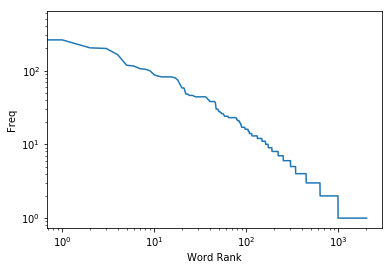

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

#### Generating histograms of words, screen names, and hashtags

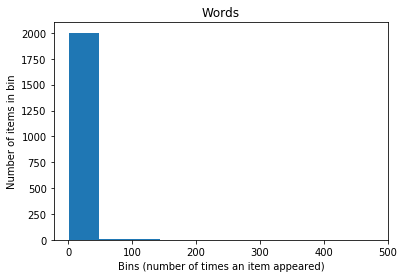

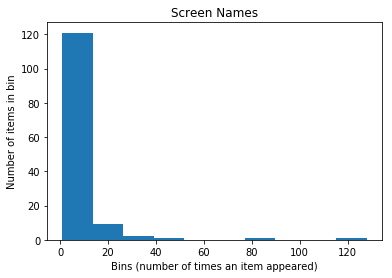

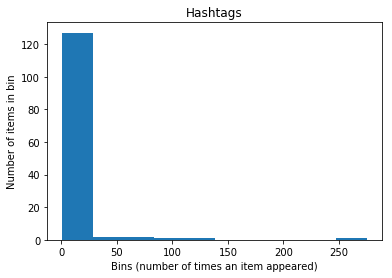

<Figure size 432x288 with 0 Axes>

In [17]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

#### Generating a histogram of retweet counts

Text(0,0.5,'Number of tweets in bin')

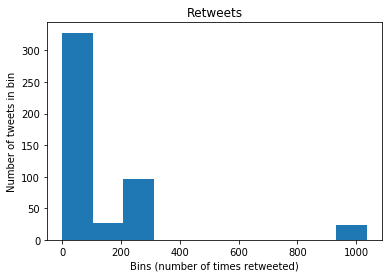

In [18]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

#### Sentiment Analysis¶

In [19]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /anaconda/envs/py36/lib/nltk_data...


/anaconda/envs/py36/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
import os
os.getcwd()

'/Users/apple/Desktop/Python/Twitter'

In [21]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [22]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [23]:
analyzer = SentimentIntensityAnalyzer()

In [24]:
analyzer.polarity_scores('Haha the caves are so popular especially among animals that are breeding that people call it "school district".')

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7661}

In [25]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [26]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [27]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.941 : "RT @heechullieoppa: happy birthday heechul, i wish you 100x more happiness than the happiness you provide all of us !! ❤️❤️❤️
#HappyHeechul…"


In [28]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.802 : "@redbird2fly @psychdr100 shit, she is shit."


#### Example 16. Making robust Twitter requests

In [29]:
import sys
import time
from urllib.error import URLError
from http.client import BadStatusLine
import json
import twitter

def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw): 
    
    # A nested helper function that handles common HTTPErrors. Return an updated
    # value for wait_period if the problem is a 500 level error. Block until the
    # rate limit is reset if it's a rate limiting issue (429 error). Returns None
    # for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
    
        if wait_period > 3600: # Seconds
            print('Too many retries. Quitting.', file=sys.stderr)
            raise e
    
        # See https://developer.twitter.com/en/docs/basics/response-codes
        # for common codes
    
        if e.e.code == 401:
            print('Encountered 401 Error (Not Authorized)', file=sys.stderr)
            return None
        elif e.e.code == 404:
            print('Encountered 404 Error (Not Found)', file=sys.stderr)
            return None
        elif e.e.code == 429: 
            print('Encountered 429 Error (Rate Limit Exceeded)', file=sys.stderr)
            if sleep_when_rate_limited:
                print("Retrying in 15 minutes...ZzZ...", file=sys.stderr)
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print('...ZzZ...Awake now and trying again.', file=sys.stderr)
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print('Encountered {0} Error. Retrying in {1} seconds'\
                  .format(e.e.code, wait_period), file=sys.stderr)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function
    
    wait_period = 2 
    error_count = 0 

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError as e:
            error_count = 0 
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("URLError encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise
        except BadStatusLine as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("BadStatusLine encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise

# Sample usage

# twitter_api = oauth_login()

# See http://bit.ly/2Gcjfzr for twitter_api.users.lookup

response = make_twitter_request(twitter_api.users.lookup, 
                                screen_name="AnimalDialogue")

print(json.dumps(response, indent=1))

[
 {
  "id": 429648768,
  "id_str": "429648768",
  "name": "AnimalDialogue_China",
  "screen_name": "AnimalDialogue",
  "location": "",
  "description": "We are dedicated to raising awareness for animal ethics and nature conservation in China.",
  "url": "https://t.co/GwJCFnFd0E",
  "entities": {
   "url": {
    "urls": [
     {
      "url": "https://t.co/GwJCFnFd0E",
      "expanded_url": "http://animaldialogue.org",
      "display_url": "animaldialogue.org",
      "indices": [
       0,
       23
      ]
     }
    ]
   },
   "description": {
    "urls": []
   }
  },
  "protected": false,
  "followers_count": 19,
  "friends_count": 124,
  "listed_count": 0,
  "created_at": "Tue Dec 06 06:38:56 +0000 2011",
  "favourites_count": 8,
  "utc_offset": null,
  "time_zone": null,
  "geo_enabled": false,
  "verified": false,
  "statuses_count": 22,
  "lang": null,
  "status": {
   "created_at": "Mon Jul 08 14:18:35 +0000 2019",
   "id": 1148234933313216513,
   "id_str": "1148234933313216513"

#### resolving user profile info

In [30]:
def get_user_profile(twitter_api, screen_names=None, user_ids=None):
   
    # Must have either screen_name or user_id (logical xor)
    assert (screen_names != None) != (user_ids != None), \
    "Must have screen_names or user_ids, but not both"
    
    items_to_info = {}

    items = screen_names or user_ids
    
    while len(items) > 0:

        # Process 100 items at a time per the API specifications for /users/lookup.
        # See http://bit.ly/2Gcjfzr for details.
        
        items_str = ','.join([str(item) for item in items[:100]])
        items = items[100:]

        if screen_names:
            response = make_twitter_request(twitter_api.users.lookup, 
                                            screen_name=items_str)
        else: # user_ids
            response = make_twitter_request(twitter_api.users.lookup, 
                                            user_id=items_str)
    
        for user_info in response:
            if screen_names:
                items_to_info[user_info['screen_name']] = user_info
            else: # user_ids
                items_to_info[user_info['id']] = user_info

    return items_to_info

# Sample usage

print(get_user_profile(twitter_api, screen_names=["AnimalDialogue"]))
#print(get_user_profile(twitter_api, user_ids=[132373965]))
print(list(get_user_profile(twitter_api, screen_names=["AnimalDialogue"])['AnimalDialogue'].keys()))

{'AnimalDialogue': {'id': 429648768, 'id_str': '429648768', 'name': 'AnimalDialogue_China', 'screen_name': 'AnimalDialogue', 'location': '', 'description': 'We are dedicated to raising awareness for animal ethics and nature conservation in China.', 'url': 'https://t.co/GwJCFnFd0E', 'entities': {'url': {'urls': [{'url': 'https://t.co/GwJCFnFd0E', 'expanded_url': 'http://animaldialogue.org', 'display_url': 'animaldialogue.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 19, 'friends_count': 124, 'listed_count': 0, 'created_at': 'Tue Dec 06 06:38:56 +0000 2011', 'favourites_count': 8, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 22, 'lang': None, 'status': {'created_at': 'Mon Jul 08 14:18:35 +0000 2019', 'id': 1148234933313216513, 'id_str': '1148234933313216513', 'text': 'Little #grebe big power🦅  #birds #naturelovers #naturephotography #animallover  @BirdingBeijing  @sonsrap10  \nPhoto… 

#### Example 19. Getting all friends or followers for a user

In [31]:
from functools import partial
from sys import maxsize as maxint

def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):
    
    # Must have either screen_name or user_id (logical xor)
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"
    
    # See http://bit.ly/2GcjKJP and http://bit.ly/2rFz90N for details
    # on API parameters
    
    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, 
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, 
                                count=5000)

    friends_ids, followers_ids = [], []
    
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"], 
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        
        if limit == 0: continue
        
        cursor = -1
        while cursor != 0:
        
            # Use make_twitter_request via the partially bound callable...
            if screen_name: 
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']
        
            print('Fetched {0} total {1} ids for {2}'.format(len(ids),\
                  label, (user_id or screen_name)),file=sys.stderr)
        
            # XXX: You may want to store data during each iteration to provide an 
            # an additional layer of protection from exceptional circumstances
        
            if len(ids) >= limit or response is None:
                break

    # Do something useful with the IDs, like store them to disk...
    return friends_ids[:friends_limit], followers_ids[:followers_limit]

# Sample usage

friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name="AnimalDialogue", 
                                                       friends_limit=10, 
                                                       followers_limit=10)

print(friends_ids)
print(followers_ids)

Fetched 124 total friends ids for AnimalDialogue


[40718425, 596252588, 14942612, 523480048, 80269993, 907366230, 493889332, 1064598087774162946, 138360455, 103887642]
[596252588, 585449610, 80269993, 2409191202, 1112035407598944256, 952798744436645889, 956494460166184966, 3309778272, 790607377196167168, 3579621921]


Fetched 19 total followers ids for AnimalDialogue


#### Example 20. Analyzing a user's friends and followers¶

In [32]:
def setwise_friends_followers_analysis(screen_name, friends_ids, followers_ids):
    
    friends_ids, followers_ids = set(friends_ids), set(followers_ids)
    
    print('{0} is following {1}'.format(screen_name, len(friends_ids)))

    print('{0} is being followed by {1}'.format(screen_name, len(followers_ids)))
    
    print('{0} of {1} are not following {2} back'.format(
            len(friends_ids.difference(followers_ids)), 
            len(friends_ids), screen_name))
    
    print('{0} of {1} are not being followed back by {2}'.format(
            len(followers_ids.difference(friends_ids)), 
            len(followers_ids), screen_name))
    
    print('{0} has {1} mutual friends'.format(
            screen_name, len(friends_ids.intersection(followers_ids))))
    
# Sample usage

screen_name = "AnimalDialogue"

friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name=screen_name)
setwise_friends_followers_analysis(screen_name, friends_ids, followers_ids)

Fetched 124 total friends ids for AnimalDialogue


AnimalDialogue is following 124
AnimalDialogue is being followed by 19
113 of 124 are not following AnimalDialogue back
8 of 19 are not being followed back by AnimalDialogue
AnimalDialogue has 11 mutual friends


Fetched 19 total followers ids for AnimalDialogue


####  Crawling a friendship graph

In [33]:
def crawl_followers(twitter_api, screen_name, limit=1000000, depth=2, **mongo_conn_kw):
    
    # Resolve the ID for screen_name and start working with IDs for consistency 
    # in storage

    seed_id = str(twitter_api.users.show(screen_name=screen_name)['id'])
    
    _, next_queue = get_friends_followers_ids(twitter_api, user_id=seed_id, 
                                              friends_limit=0, followers_limit=limit)

    # Store a seed_id => _follower_ids mapping in MongoDB
    
#     save_to_mongo({'followers' : [ _id for _id in next_queue ]}, 'followers_crawl', 
#                   '{0}-follower_ids'.format(seed_id), **mongo_conn_kw)
    
    d = 1
    while d < depth:
        d += 1
        (queue, next_queue) = (next_queue, [])
        for fid in queue:
            _, follower_ids = get_friends_followers_ids(twitter_api, user_id=fid, 
                                                     friends_limit=0, 
                                                     followers_limit=limit)
            
#             # Store a fid => follower_ids mapping in MongoDB
#             save_to_mongo({'followers' : [ _id for _id in follower_ids ]}, 
#                           'followers_crawl', '{0}-follower_ids'.format(fid))
            
            next_queue += follower_ids

# Sample usage

screen_name = "AnimalDialogue"

crawl_followers(twitter_api, screen_name, depth=1, limit=10, host='mongodb://172.16.0.1:27017')

Fetched 19 total followers ids for 429648768


#### Example 4. Searching for tweets

In [34]:
def twitter_search(twitter_api, q, max_results=200, **kw):

    # See https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets
    # and https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators
    # for details on advanced search criteria that may be useful for 
    # keyword arguments
    
    # See https://dev.twitter.com/docs/api/1.1/get/search/tweets    
    search_results = twitter_api.search.tweets(q=q, count=100, **kw)
    
    statuses = search_results['statuses']
    
    # Iterate through batches of results by following the cursor until we
    # reach the desired number of results, keeping in mind that OAuth users
    # can "only" make 180 search queries per 15-minute interval. See
    # https://developer.twitter.com/en/docs/basics/rate-limits
    # for details. A reasonable number of results is ~1000, although
    # that number of results may not exist for all queries.
    
    # Enforce a reasonable limit
    max_results = min(1000, max_results)
    
    for _ in range(10): # 10*100 = 1000
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError as e: # No more results when next_results doesn't exist
            break
            
        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([ kv.split('=') 
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results: 
            break
            
    return statuses

# Sample usage

q = "China Animal"
results = twitter_search(twitter_api, q, max_results=10)
        
# Show one sample search result by slicing the list...
print(json.dumps(results[0], indent=1))

{
 "created_at": "Thu Jul 11 00:20:38 +0000 2019",
 "id": 1149111218667474944,
 "id_str": "1149111218667474944",
 "text": "RT @BreitbartNews: China is breeding lions and tigers to meet the growing demand for traditional Chinese \"medicine,\" the NGO World Animal P\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "BreitbartNews",
    "name": "Breitbart News",
    "id": 457984599,
    "id_str": "457984599",
    "indices": [
     3,
     17
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user": {
  "id": 35309264,
  "id_str": "35309264",
  "name": "Mary Meisch",
  "screen_name": "mgmeisch",


#### Extract Tweet Entities

In [35]:
def extract_tweet_entities(statuses):
    
    # See https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object
    # for more details on tweet entities

    if len(statuses) == 0:
        return [], [], [], [], []
    
    screen_names = [ user_mention['screen_name'] 
                         for status in statuses
                            for user_mention in status['entities']['user_mentions'] ]
    
    hashtags = [ hashtag['text'] 
                     for status in statuses 
                        for hashtag in status['entities']['hashtags'] ]

    urls = [ url['expanded_url'] 
                     for status in statuses 
                        for url in status['entities']['urls'] ]
               
    # In some circumstances (such as search results), the media entity
    # may not appear
    medias = []
    symbols = []
    for status in statuses:
        if 'media' in status['entities']:
            for media in status['entities']['media']:
                medias.append(media['url'])
        if 'symbol' in status['entities']:
            for symbol in status['entities']['symbol']:
                symbols.append(symbol)
    
    return screen_names, hashtags, urls, medias, symbols

# Sample usage

q = 'China Animal'

statuses = twitter_search(twitter_api, q)

screen_names, hashtags, urls, media, symbols = extract_tweet_entities(statuses)
    
# Explore the first five items for each...

print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(urls[0:5], indent=1))
print(json.dumps(media[0:5], indent=1))
print(json.dumps(symbols[0:5], indent=1))

[
 "BreitbartNews",
 "ipandacom",
 "BreitbartNews",
 "ipandacom",
 "BreitbartNews"
]
[
 "panda",
 "\u4e2d\u56fd",
 "\u4e2d\u570b",
 "\u4e0a\u6d77",
 "Shanghai"
]
[
 "https://www.express.co.uk/news/world/441130/Animal-cruelty-in-China-exposed-as-dogs-killed-in-street-by-laughing-mob-including-police",
 "https://twitter.com/i/web/status/1149100214474674177",
 "http://shr.gs/uN5vX1S",
 "https://twitter.com/i/web/status/1149086528045326336",
 "https://twitter.com/i/web/status/1149066824438427649"
]
[]
[]


#### Example 12. Finding the most popular tweet entities in a collection of tweets

In [36]:
import twitter
from collections import Counter

def get_common_tweet_entities(statuses, entity_threshold=3):

    # Create a flat list of all tweet entities
    tweet_entities = [  e
                        for status in statuses
                            for entity_type in extract_tweet_entities([status]) 
                                for e in entity_type 
                     ]

    c = Counter(tweet_entities).most_common()

    # Compute frequencies
    return [ (k,v) 
             for (k,v) in c
                 if v >= entity_threshold
           ]

# Sample usage

q = 'China Animal'

search_results = twitter_search(twitter_api, q, max_results=100)
common_entities = get_common_tweet_entities(search_results)

print("Most common tweet entities")
print(common_entities)

Most common tweet entities
[('ipandacom', 45), ('panda', 27), ('BreitbartNews', 22), ('OnlyNomaly', 9)]


In [37]:
def analyze_tweet_content(statuses):
    
    if len(statuses) == 0:
        print("No statuses to analyze")
        return
    
    # A nested helper function for computing lexical diversity
    def lexical_diversity(tokens):
        return 1.0*len(set(tokens))/len(tokens) 
    
    # A nested helper function for computing the average number of words per tweet
    def average_words(statuses):
        total_words = sum([ len(s.split()) for s in statuses ]) 
        return 1.0*total_words/len(statuses)

    status_texts = [ status['text'] for status in statuses ]
    screen_names, hashtags, urls, media, _ = extract_tweet_entities(statuses)
    
    # Compute a collection of all words from all tweets
    words = [ w 
          for t in status_texts 
              for w in t.split() ]
    
    print("Lexical diversity (words):", lexical_diversity(words))
    print("Lexical diversity (screen names):", lexical_diversity(screen_names))
    print("Lexical diversity (hashtags):", lexical_diversity(hashtags))
    print("Averge words per tweet:", average_words(status_texts))

    
# Sample usage

q = 'China Animal'
#twitter_api = oauth_login()
search_results = twitter_search(twitter_api, q)

analyze_tweet_content(search_results)

Lexical diversity (words): 0.12006157003591586
Lexical diversity (screen names): 0.20652173913043478
Lexical diversity (hashtags): 0.4222222222222222
Averge words per tweet: 22.662790697674417


#### Example 25. Analyzing a user's favorite tweets

In [38]:
def analyze_favorites(twitter_api, screen_name, entity_threshold=2):
    
    # Could fetch more than 200 by walking the cursor as shown in other
    # recipes, but 200 is a good sample to work with.
    favs = twitter_api.favorites.list(screen_name=screen_name, count=200)
    print("Number of favorites:", len(favs))
    
    # Figure out what some of the common entities are, if any, in the content
    
    common_entities = get_common_tweet_entities(favs, 
                                                entity_threshold=entity_threshold)
    
    # Use PrettyTable to create a nice tabular display
    
    pt = PrettyTable(field_names=['Entity', 'Count']) 
    [ pt.add_row(kv) for kv in common_entities ]
    pt.align['Entity'], pt.align['Count'] = 'l', 'r' # Set column alignment
    
    print()
    print("Common entities in favorites...")
    print(pt)
    
    
    # Print out some other stats
    print()
    print("Some statistics about the content of the favorities...")
    print()
    analyze_tweet_content(favs)
    
    # Could also start analyzing link content or summarized link content, and more.

# Sample usage

analyze_favorites(twitter_api, "AnimalDialogue")

Number of favorites: 8

Common entities in favorites...
+--------+-------+
| Entity | Count |
+--------+-------+
+--------+-------+

Some statistics about the content of the favorities...

Lexical diversity (words): 0.8898305084745762
Lexical diversity (screen names): 1.0
Lexical diversity (hashtags): 1.0
Averge words per tweet: 14.75


#### Harvesting a user's tweets

In [39]:
def harvest_user_timeline(twitter_api, screen_name=None, user_id=None, max_results=1000):
     
    assert (screen_name != None) != (user_id != None), \
    "Must have screen_name or user_id, but not both"    
    
    kw = {  # Keyword args for the Twitter API call
        'count': 200,
        'trim_user': 'true',
        'include_rts' : 'true',
        'since_id' : 1
        }
    
    if screen_name:
        kw['screen_name'] = screen_name
    else:
        kw['user_id'] = user_id
        
    max_pages = 16
    results = []
    
    tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
    
    if tweets is None: # 401 (Not Authorized) - Need to bail out on loop entry
        tweets = []
        
    results += tweets
    
    print('Fetched {0} tweets'.format(len(tweets)), file=sys.stderr)
    
    page_num = 1
    
    # Many Twitter accounts have fewer than 200 tweets so you don't want to enter
    # the loop and waste a precious request if max_results = 200.
    
    # Note: Analogous optimizations could be applied inside the loop to try and 
    # save requests. e.g. Don't make a third request if you have 287 tweets out of 
    # a possible 400 tweets after your second request. Twitter does do some 
    # post-filtering on censored and deleted tweets out of batches of 'count', though,
    # so you can't strictly check for the number of results being 200. You might get
    # back 198, for example, and still have many more tweets to go. If you have the
    # total number of tweets for an account (by GET /users/lookup/), then you could 
    # simply use this value as a guide.
    
    if max_results == kw['count']:
        page_num = max_pages # Prevent loop entry
    
    while page_num < max_pages and len(tweets) > 0 and len(results) < max_results:
    
        # Necessary for traversing the timeline in Twitter's v1.1 API:
        # get the next query's max-id parameter to pass in.
        # See https://dev.twitter.com/docs/working-with-timelines.
        kw['max_id'] = min([ tweet['id'] for tweet in tweets]) - 1 
    
        tweets = make_twitter_request(twitter_api.statuses.user_timeline, **kw)
        results += tweets

        print('Fetched {0} tweets'.format(len(tweets)),file=sys.stderr)
    
        page_num += 1
        
    print('Done fetching tweets', file=sys.stderr)

    return results[:max_results]
    
# Sample usage

#twitter_api = oauth_login()
tweets = harvest_user_timeline(twitter_api, screen_name="AnimalDialogue", \
                               max_results=200)

# Save to MongoDB with save_to_mongo or a local file with save_json...

Fetched 22 tweets
Done fetching tweets


In [40]:
tweets

[{'created_at': 'Mon Jul 08 14:18:35 +0000 2019',
  'id': 1148234933313216513,
  'id_str': '1148234933313216513',
  'text': 'Little #grebe big power🦅  #birds #naturelovers #naturephotography #animallover  @BirdingBeijing  @sonsrap10  \nPhoto… https://t.co/GS8yW5vLr6',
  'truncated': True,
  'entities': {'hashtags': [{'text': 'grebe', 'indices': [7, 13]},
    {'text': 'birds', 'indices': [26, 32]},
    {'text': 'naturelovers', 'indices': [33, 46]},
    {'text': 'naturephotography', 'indices': [47, 65]},
    {'text': 'animallover', 'indices': [66, 78]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'BirdingBeijing',
     'name': 'Birding Beijing 北京观鸟',
     'id': 596252588,
     'id_str': '596252588',
     'indices': [80, 95]},
    {'screen_name': 'sonsrap10',
     'name': 'Trevor parsons',
     'id': 914824408610590722,
     'id_str': '914824408610590722',
     'indices': [97, 107]}],
   'urls': [{'url': 'https://t.co/GS8yW5vLr6',
     'expanded_url': 'https://twitter.com/i/we